In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import files
files.upload()

Saving BTC-USD (2).csv to BTC-USD (2).csv


{'BTC-USD (2).csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2021-01-27,32564.029297,32564.029297,29367.138672,30432.546875,30432.546875,62576762015\n2021-01-28,30441.041016,33858.312500,30023.207031,33466.097656,33466.097656,76517157706\n2021-01-29,34318.671875,38406.261719,32064.814453,34316.386719,34316.386719,117894572511\n2021-01-30,34295.933594,34834.707031,32940.187500,34269.523438,34269.523438,65141828798\n2021-01-31,34270.878906,34288.332031,32270.175781,33114.359375,33114.359375,52754542671\n2021-02-01,33114.578125,34638.214844,32384.228516,33537.175781,33537.175781,61400400660\n2021-02-02,33533.199219,35896.882813,33489.218750,35510.289063,35510.289063,63088585433\n2021-02-03,35510.820313,37480.187500,35443.984375,37472.089844,37472.089844,61166818159\n2021-02-04,37475.105469,38592.175781,36317.500000,36926.066406,36926.066406,68838074392\n2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402\n2021-02-06,38138.386719,40846.546875,38138.3

In [6]:
#Store the data
df = pd.read_csv('BTC-USD (2).csv')
#Set date as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#Show data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2021-01-27,2021-01-27,32564.029297,32564.029297,29367.138672,30432.546875,30432.546875,6.257676e+10
2021-01-28,2021-01-28,30441.041016,33858.312500,30023.207031,33466.097656,33466.097656,7.651716e+10
2021-01-29,2021-01-29,34318.671875,38406.261719,32064.814453,34316.386719,34316.386719,1.178946e+11
2021-01-30,2021-01-30,34295.933594,34834.707031,32940.187500,34269.523438,34269.523438,6.514183e+10
2021-01-31,2021-01-31,34270.878906,34288.332031,32270.175781,33114.359375,33114.359375,5.275454e+10
...,...,...,...,...,...,...,...
2022-01-23,2022-01-23,35047.359375,36433.312500,34784.968750,36276.804688,36276.804688,2.601798e+10
2022-01-24,2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,4.185666e+10
2022-01-25,2022-01-25,36654.804688,37444.570313,35779.429688,36954.003906,36954.003906,2.642819e+10
2022-01-26,2022-01-26,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def SMA(data, period=30, column='Close'):
  return data[column].rolling(window=period).mean()

In [9]:
df['ShortSMA'] = SMA(df, 50)
df['LongSMA'] = SMA(df, 200)

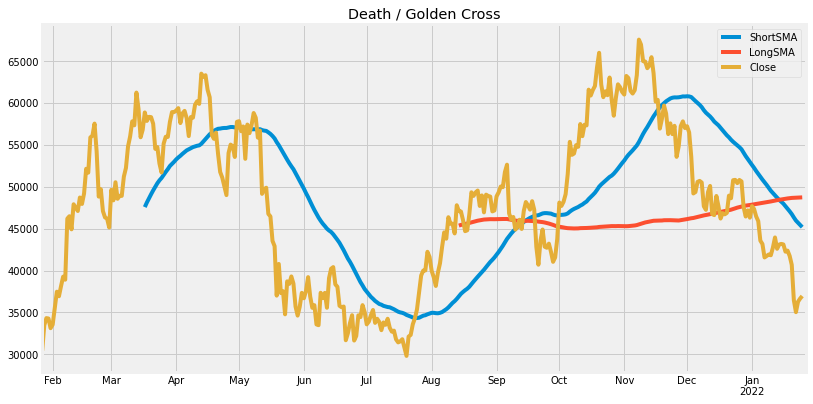

In [11]:
column_list = ['ShortSMA','LongSMA','Close']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('Death / Golden Cross')
plt.show()

In [18]:
def death_golden_cross():
  first_cross = 0
  for i in range(0, len(df)):
    if df['ShortSMA'][i] < df['LongSMA'][i] and first_cross == 0:
      print('Death cross on day', df.index[i], ': expect the price to continude to fall')
      first_cross = 1
    elif df['ShortSMA'][i] > df['LongSMA'][i] and first_cross == 1:
      print('Golden cross on day', df.index[i], ': expect the price to continude to rise')
      first_cross = 0

In [19]:
death_golden_cross()

Death cross on day 2021-08-14 00:00:00 : expect the price to continude to fall
Golden cross on day 2021-09-15 00:00:00 : expect the price to continude to rise
Death cross on day 2022-01-14 00:00:00 : expect the price to continude to fall
